In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.utils import resample
import os

In [62]:
# Llegim el nom dels nodes.
# Obrim el fitxer '.txt' i  llegim les linies.
with open('mindboggle_ROIs_class.txt', 'r') as file:
    header_line = file.readline().strip()

    data = []

    for line in file:
        values = line.strip().split('\t')
        data.append(values)

dict_data = dict()
for i in data:
    node=int(i[0])-1
    dict_data[str(node)] = i[1]
#dict_data

### Global Metrics

In [63]:
# Read CSV File.
file_metrics = 'table_metrics_functional.csv'
#file_metrics = 'table_metrics_structural.csv'
#file_metrics = 'table_metrics_morphological.csv'

df = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,26.510647,0.246316,0.244504,0.133929,28.592105,0.318230,0.335831,1.684211,0.014446,12.318171
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,27.518505,0.229123,0.266561,0.063872,26.039474,0.283577,0.338429,2.315789,0.020698,11.830955
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,22.584145,0.214035,0.322041,0.069352,28.368421,0.303126,0.328440,2.210526,0.007373,11.378702
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,26.432138,0.265965,0.251384,0.115483,95.118421,0.399505,0.346290,2.223684,0.025632,13.077351
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,25.825618,0.240000,0.241344,0.032065,34.750000,0.301244,0.309912,1.881579,0.010379,11.885499


In [64]:
print(f"Connexions MS: {np.mean(list(df[df['controls_ms'] == 1]['edges']))}")
print(f"Connexions HV: {np.mean(list(df[df['controls_ms'] == 0]['edges']))}")

Connexions MS: 937.7576559297137
Connexions HV: 945.6180896935737


* Implementa la imputació de valors nuls per assegurar-te un bon anàlisi davant les dades incompletes.

In [65]:
# Imputació de valors null
# Check which columns has null values.
for variable in df.columns:
    if df[variable].isna().any():
        print(f"Column {variable} needs imputation in NULL values.")


Column Unnamed_0 needs imputation in NULL values.
Column redcap_event_name needs imputation in NULL values.
Column age needs imputation in NULL values.
Column sex needs imputation in NULL values.
Column dd needs imputation in NULL values.
Column mstype needs imputation in NULL values.
Column dmd needs imputation in NULL values.
Column edss needs imputation in NULL values.
Column uGMSSS needs imputation in NULL values.
Column oGMSSS needs imputation in NULL values.
Column sdmt needs imputation in NULL values.
Column sdmtz needs imputation in NULL values.
Column pasat needs imputation in NULL values.
Column zpasat needs imputation in NULL values.
Column zverbalmemory needs imputation in NULL values.
Column zvisualmemory needs imputation in NULL values.
Column zattention needs imputation in NULL values.
Column zfluency needs imputation in NULL values.
Column zglobal needs imputation in NULL values.
Column FA needs imputation in NULL values.
Column GM needs imputation in NULL values.
Colum

In [66]:
# Summary of all columns
df.describe()

,Var1,Unnamed_0,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,...,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
count,265.000000,165.000000,265.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,132.000000,82.000000,0.554717,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,...,25.302039,0.256184,0.252956,0.057349,56.929841,0.353201,0.334362,2.367378,0.011140,12.579061
std,76.643112,47.775517,0.497937,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,...,2.349938,0.017672,0.045695,0.040903,45.122352,0.049101,0.020999,0.433522,0.009358,0.779402
min,0.000000,0.000000,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,...,19.812437,0.202456,0.186250,-0.052587,7.789474,0.241047,0.275540,1.394737,0.000000,9.799069
25%,66.000000,41.000000,0.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,...,23.780109,0.250175,0.217079,0.028428,21.500000,0.319207,0.319263,1.986842,0.005599,12.273330
50%,132.000000,82.000000,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,...,25.282412,0.258947,0.242262,0.051149,31.578947,0.348495,0.333801,2.368421,0.009033,12.571418
75%,198.000000,123.000000,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,...,26.725939,0.264561,0.281866,0.082807,98.092105,0.400302,0.347945,2.618421,0.014188,13.036207
max,264.000000,164.000000,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,...,33.193278,0.305614,0.414482,0.173790,181.631579,0.447488,0.398368,3.592105,0.083466,14.963538


In [67]:
# Select the required columns.
columns_x = ['age', 'sex', 'edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'eloc', 'modularity', 'transitivity', 'strength']

# Fill missing values using the mean().
#df.fillna(df.mean(), inplace=True)

X = df[columns_x]
X.head()

,age,sex,edges,degree,max_degree,density,clustering_coef,assortativity,betw_centr,eglob,eloc,modularity,transitivity,strength
0,51.53,1.0,918.383254,9.973684,26.510647,0.246316,0.244504,0.133929,28.592105,0.318230,0.335831,1.684211,0.014446,12.318171
1,58.06,0.0,891.677004,8.907895,27.518505,0.229123,0.266561,0.063872,26.039474,0.283577,0.338429,2.315789,0.020698,11.830955
2,60.78,1.0,839.539014,9.000000,22.584145,0.214035,0.322041,0.069352,28.368421,0.303126,0.328440,2.210526,0.007373,11.378702
3,37.95,0.0,986.034557,10.197368,26.432138,0.265965,0.251384,0.115483,95.118421,0.399505,0.346290,2.223684,0.025632,13.077351
4,52.64,0.0,890.288946,9.500000,25.825618,0.240000,0.241344,0.032065,34.750000,0.301244,0.309912,1.881579,0.010379,11.885499


In [68]:
y = df['controls_ms']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: controls_ms, dtype: int64

In [69]:
df_HV = df[df['controls_ms'] == 0]
df_MS = df[df['controls_ms'] == 1]


In [70]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics = list()
list_bonferroni_correction = dict()
num_matrius = len(df)

for metric in ['edges', 'degree', 'max_degree', 'density', 'clustering_coef', 'assortativity', 'betw_centr', 'eglob', 'modularity','transitivity', 'strength']:
    dades_HV = df[df['controls_ms'] == 0][metric]
    dades_MS = df[df['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction[metric] = pval_corrected   
        list_significative_metrics.append(metric)
        

Metric: degree pvalue: 4.3612124994859976e-07
Metric: max_degree pvalue: 1.0619509810598455e-06
Metric: clustering_coef pvalue: 2.3847078586319976e-10
Metric: assortativity pvalue: 1.1099811771743618e-08
Metric: eglob pvalue: 0.011888087187154272


In [71]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction.keys())

['degree', 'max_degree', 'clustering_coef', 'assortativity', 'eglob']

In [72]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction.keys()):
    mean_MS_ = np.mean(df_MS[metric])
    std_MS_ = np.std(df_MS[metric])
    
    mean_HV_ = np.mean(df_MS[metric])
    std_HV_ = np.std(df_MS[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree: MS: 10.002864303616185 (0.8725956105712799), HV: 10.002864303616185 (0.8725956105712799), Pvalue: 4.3612124994859976e-07 

Metric - max_degree: MS: 26.02526763228428 (2.3691205494279606), HV: 26.02526763228428 (2.3691205494279606), Pvalue: 1.0619509810598455e-06 

Metric - clustering_coef: MS: 0.26967053487769715 (0.04641075915979285), HV: 0.26967053487769715 (0.04641075915979285), Pvalue: 2.3847078586319976e-10 

Metric - assortativity: MS: 0.07164608495112988 (0.04096378974034411), HV: 0.07164608495112988 (0.04096378974034411), Pvalue: 1.1099811771743618e-08 

Metric - eglob: MS: 0.343257617261734 (0.05218048664946802), HV: 0.343257617261734 (0.05218048664946802), Pvalue: 0.011888087187154272 



In [73]:
#list_significative_metrics.append('sex')
#list_significative_metrics.append('age')

# Llistat a utilitzar per aplicar models ML.
print(list(list_significative_metrics))

['degree', 'max_degree', 'clustering_coef', 'assortativity', 'eglob']


Training set - Features: (212, 5), Labels: (212,)
Testing set - Features: (53, 5) Labels: (53,)


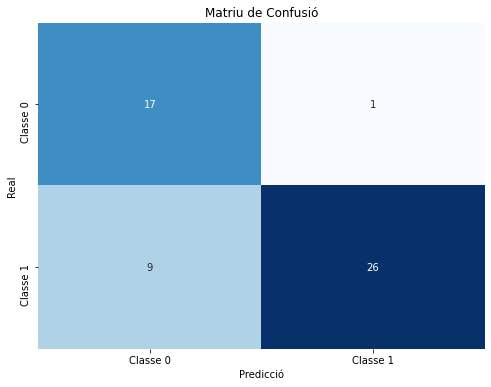

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        18
           1       0.96      0.74      0.84        35

    accuracy                           0.81        53
   macro avg       0.81      0.84      0.81        53
weighted avg       0.86      0.81      0.82        53



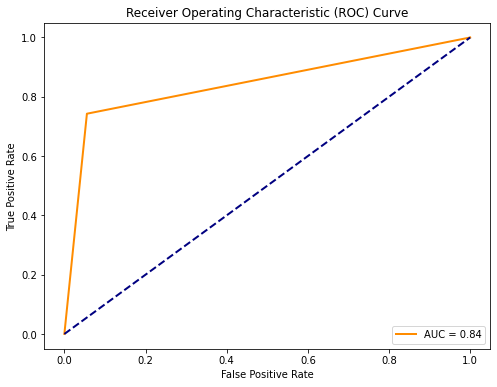

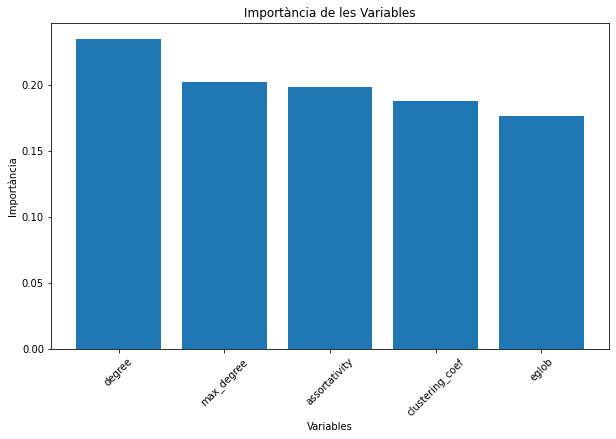

In [74]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Support Vector Machine**

Training set - Features: (212, 5), Labels: (212,)
Testing set - Features: (53, 5) Labels: (53,)


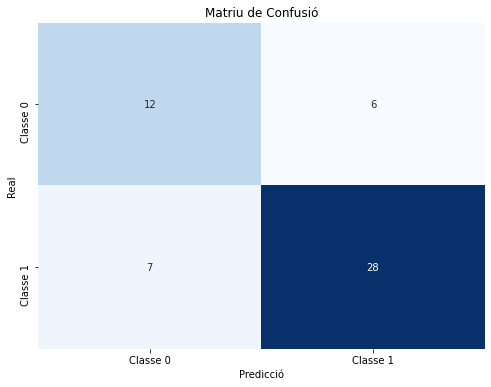

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.82      0.80      0.81        35

    accuracy                           0.75        53
   macro avg       0.73      0.73      0.73        53
weighted avg       0.76      0.75      0.76        53



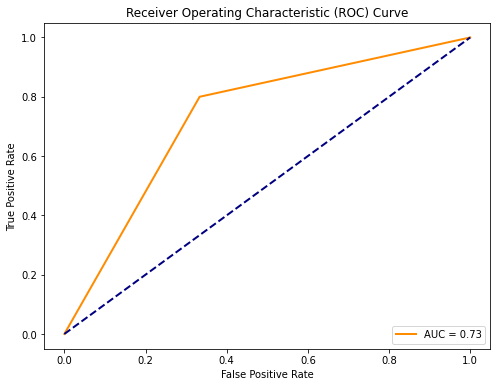

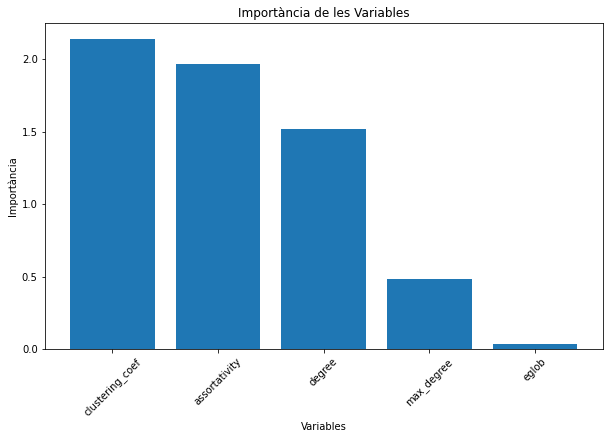

In [75]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: KNN**

Training set - Features: (212, 5), Labels: (212,)
Testing set - Features: (53, 5) Labels: (53,)


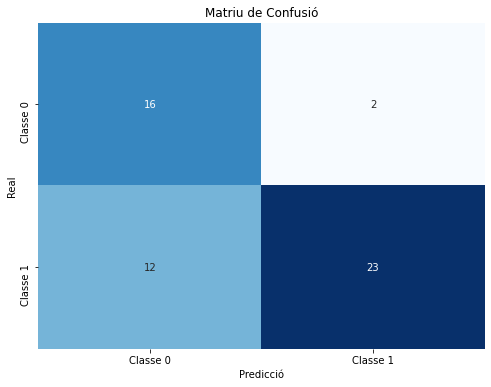

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        18
           1       0.92      0.66      0.77        35

    accuracy                           0.74        53
   macro avg       0.75      0.77      0.73        53
weighted avg       0.80      0.74      0.74        53



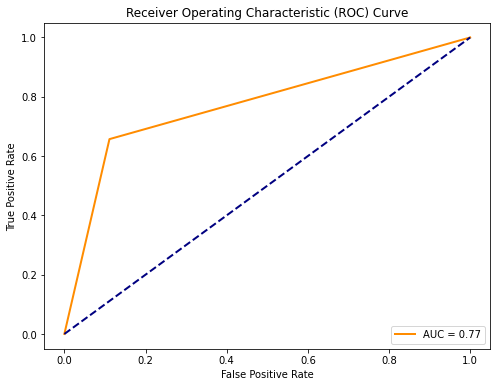

In [76]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = X[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Global: Logistic Regression**

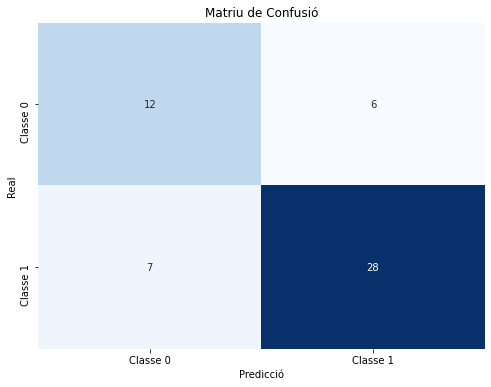

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.82      0.80      0.81        35

    accuracy                           0.75        53
   macro avg       0.73      0.73      0.73        53
weighted avg       0.76      0.75      0.76        53



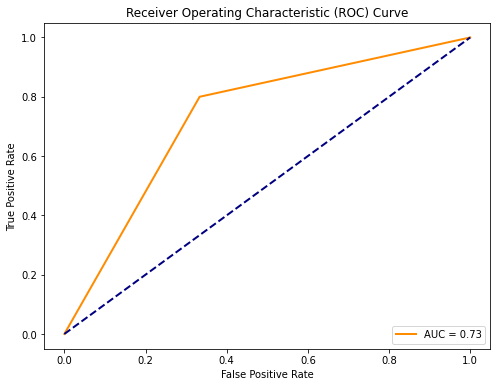

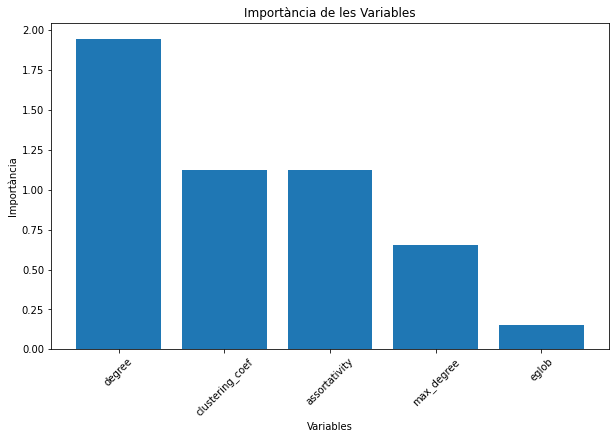

In [77]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Global: Gaussian Naive Bayes**

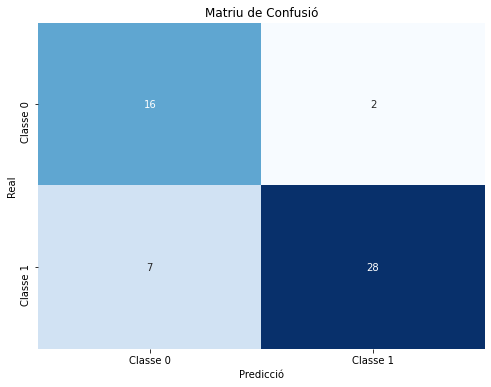

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        18
           1       0.93      0.80      0.86        35

    accuracy                           0.83        53
   macro avg       0.81      0.84      0.82        53
weighted avg       0.85      0.83      0.83        53



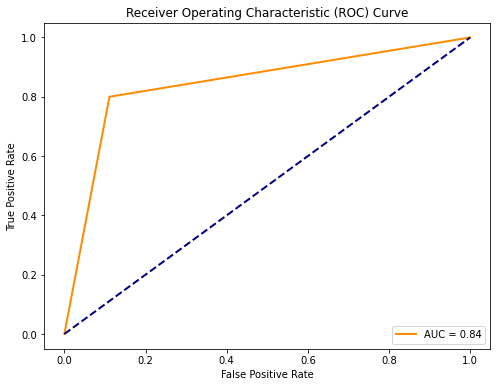

In [78]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df[list_significative_metrics]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Local Metrics

In [79]:
# Read CSV File.
file_metrics = 'table_metrics_local_functional.csv'
#file_metrics = 'table_metrics_local_structural.csv'
#file_metrics = 'table_metrics_local_morphological.csv'

df_local = pd.read_csv(os.path.join('/home/guillem/Downloads/', file_metrics))
df_local.head()


,Var1,Unnamed_0,id,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,...,modularity_66,modularity_67,modularity_68,modularity_69,modularity_70,modularity_71,modularity_72,modularity_73,modularity_74,modularity_75
0,0,0.0,002MSVIS,year3_arm_1,1,04-Sep-1963,10-Jan-1993,16-Mar-2015,51.53,1.0,...,2,2,3,2,2,2,1,2,2,2
1,1,1.0,003MSVIS,year5_arm_1,1,18-Jan-1959,15-Jul-2007,08-Feb-2017,58.06,0.0,...,2,2,3,3,3,2,3,2,3,3
2,2,2.0,004MSVIS,year5_arm_1,1,16-Sep-1956,15-Sep-2010,29-Jun-2017,60.78,1.0,...,1,4,2,2,2,2,1,1,1,1
3,3,3.0,005MSVIS,year5_arm_1,1,01-Feb-1978,01-Aug-2007,13-Jan-2016,37.95,0.0,...,1,2,2,1,1,1,1,1,1,1
4,4,4.0,010MSVIS,year5_arm_1,1,13-Feb-1964,15-Sep-2007,04-Oct-2016,52.64,0.0,...,2,1,2,2,2,2,2,2,2,2


In [80]:
# Obtenim el llistat de mètriques locals.
# Get index of 'degree_0'.
index_of_degree0 = df_local.columns.get_loc('degree_0')
list_local_metrics = list(df_local.columns)[index_of_degree0:]


In [81]:
df_MS_local = df_local[df_local['controls_ms'] == 1]
df_HV_local = df_local[df_local['controls_ms'] == 0]

In [82]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Agafem les metriques que es diferencien significativament entre MS i HV per Correcció de Bonferroni.
alpha = 0.05

def check_normality(data, alpha):
    _, p_value = shapiro(data)
    return p_value > alpha

list_significative_metrics_local = list()
list_bonferroni_correction_local = dict()
num_matrius = len(df)

for metric in list_local_metrics:
    dades_HV = df_local[df_local['controls_ms'] == 0][metric]
    dades_MS = df_local[df_local['controls_ms'] == 1][metric]

    normalitat_MS = check_normality(dades_MS, alpha)
    normalitat_HV = check_normality(dades_HV, alpha)
    
    # Es comprova si les dades segueixen una distribució normal.
    if normalitat_MS and normalitat_HV:
        # Si HV i MS segueixen una distribució normal, utilitzem la prova t.
        _, pval = ttest_ind(dades_HV, dades_MS)
        
    # Si no segueixen una distribució normal.
    else:
        # S'utilitza la prova U de Mann-Whitney
        _, pval = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    
    # S'aplica la correció de bonferroni.
    pval_corrected = pval*num_matrius
    
    # Si el pvalue es menor de alpha.
    if pval_corrected <= alpha:
        print(f"Metric: {metric} pvalue: {pval_corrected}")
        list_bonferroni_correction_local[metric] = pval_corrected   
        list_significative_metrics_local.append(metric)
        

Metric: degree_1 pvalue: 6.944211035827309e-05
Metric: degree_4 pvalue: 7.955903600009997e-06
Metric: degree_12 pvalue: 0.0010956036084818733
Metric: degree_14 pvalue: 0.0007756266522946231
Metric: degree_17 pvalue: 0.010648265993574118
Metric: degree_19 pvalue: 0.019645848711149685
Metric: degree_21 pvalue: 0.017303433492800366
Metric: degree_22 pvalue: 2.904933756859512e-06
Metric: degree_23 pvalue: 0.00014499759905383503
Metric: degree_31 pvalue: 0.0037917621331082984
Metric: degree_35 pvalue: 1.59509171733354e-05
Metric: degree_36 pvalue: 1.8133682360130656e-08
Metric: degree_37 pvalue: 0.00043594977652312893
Metric: degree_39 pvalue: 0.007880082353271117
Metric: degree_42 pvalue: 5.676866998382903e-05
Metric: degree_44 pvalue: 4.271985400724169e-07
Metric: degree_54 pvalue: 0.037734190016955445
Metric: degree_58 pvalue: 0.0001459050238234562
Metric: degree_61 pvalue: 2.801748237562488e-06
Metric: degree_64 pvalue: 0.00014552343587819963
Metric: degree_68 pvalue: 6.743738770876257e

/home/guillem/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Metric: clust_coef_10 pvalue: 3.922168727919321e-15
Metric: clust_coef_11 pvalue: 2.80492122314205e-12
Metric: clust_coef_12 pvalue: 3.9483920553204006e-08
Metric: clust_coef_14 pvalue: 1.0358743706280427e-18
Metric: clust_coef_15 pvalue: 2.7672518510319646e-16
Metric: clust_coef_16 pvalue: 2.317877686158609e-13
Metric: clust_coef_17 pvalue: 3.176875584580536e-13
Metric: clust_coef_18 pvalue: 4.094066963395067e-17
Metric: clust_coef_19 pvalue: 1.2954587663059226e-13
Metric: clust_coef_20 pvalue: 1.6947473929746305e-10
Metric: clust_coef_21 pvalue: 6.271555277386966e-08
Metric: clust_coef_22 pvalue: 2.2253443530149883e-14
Metric: clust_coef_23 pvalue: 4.0986935148779525e-09
Metric: clust_coef_24 pvalue: 1.5927622468711585e-08
Metric: clust_coef_25 pvalue: 9.359118518992994e-09
Metric: clust_coef_26 pvalue: 2.6502017853913396e-10
Metric: clust_coef_27 pvalue: 9.62869498539544e-05
Metric: clust_coef_28 pvalue: 0.0003875670953470949
Metric: clust_coef_32 pvalue: 0.00024156653867539693
Metr

In [83]:
# Mètriques amb diferències significatives entr eMS i HV.
list(list_bonferroni_correction_local.keys())

['degree_1',
 'degree_4',
 'degree_12',
 'degree_14',
 'degree_17',
 'degree_19',
 'degree_21',
 'degree_22',
 'degree_23',
 'degree_31',
 'degree_35',
 'degree_36',
 'degree_37',
 'degree_39',
 'degree_42',
 'degree_44',
 'degree_54',
 'degree_58',
 'degree_61',
 'degree_64',
 'degree_68',
 'degree_69',
 'degree_74',
 'degree_75',
 'betw_centr_0',
 'betw_centr_2',
 'betw_centr_20',
 'betw_centr_21',
 'betw_centr_24',
 'betw_centr_26',
 'betw_centr_31',
 'betw_centr_35',
 'betw_centr_36',
 'betw_centr_38',
 'betw_centr_44',
 'betw_centr_46',
 'betw_centr_47',
 'betw_centr_50',
 'betw_centr_55',
 'betw_centr_57',
 'eigenv_centr_14',
 'eigenv_centr_16',
 'eigenv_centr_23',
 'eigenv_centr_24',
 'eigenv_centr_26',
 'pager_centr_1',
 'pager_centr_5',
 'pager_centr_7',
 'pager_centr_12',
 'pager_centr_14',
 'pager_centr_15',
 'pager_centr_16',
 'pager_centr_17',
 'pager_centr_18',
 'pager_centr_19',
 'pager_centr_20',
 'pager_centr_21',
 'pager_centr_23',
 'pager_centr_24',
 'pager_centr_25'

In [84]:
len(list_bonferroni_correction_local)

170

In [85]:
# Constructuct Table (as 'Table 2')
# HEADER: ('MS patients (N = XXX)', 'HV (N = YYY)', 'p value')
# Metrics:  
# 'degree': 0.36 (0.02)  0.34 (0.02)  < 0.001
# etc.

print("Metric  -  MS patients  -  HV volunteers  -  Pvalue")
for metric in list(list_bonferroni_correction_local.keys()):
    mean_MS_ = np.mean(df_MS_local[metric])
    std_MS_ = np.std(df_MS_local[metric])
    
    mean_HV_ = np.mean(df_MS_local[metric])
    std_HV_ = np.std(df_MS_local[metric])
    
    print(f'Metric - {metric}: MS: {mean_MS_} ({std_MS_}), HV: {mean_HV_} ({std_HV_}), Pvalue: {list_bonferroni_correction_local[metric]} \n')


Metric  -  MS patients  -  HV volunteers  -  Pvalue
Metric - degree_1: MS: 1.3265306122448979 (0.8663259296649438), HV: 1.3265306122448979 (0.8663259296649438), Pvalue: 6.944211035827309e-05 

Metric - degree_4: MS: 1.7687074829931972 (0.7005151380601905), HV: 1.7687074829931972 (0.7005151380601905), Pvalue: 7.955903600009997e-06 

Metric - degree_12: MS: 8.986394557823129 (1.5517661412884656), HV: 8.986394557823129 (1.5517661412884656), Pvalue: 0.0010956036084818733 

Metric - degree_14: MS: 6.3061224489795915 (1.5501250548541299), HV: 6.3061224489795915 (1.5501250548541299), Pvalue: 0.0007756266522946231 

Metric - degree_17: MS: 6.068027210884353 (1.1288418238199478), HV: 6.068027210884353 (1.1288418238199478), Pvalue: 0.010648265993574118 

Metric - degree_19: MS: 9.285714285714286 (2.1852940772540506), HV: 9.285714285714286 (2.1852940772540506), Pvalue: 0.019645848711149685 

Metric - degree_21: MS: 11.46938775510204 (2.3395624989259587), HV: 11.46938775510204 (2.3395624989259587)


Metric - clust_coef_51: MS: 0.21384515766453946 (0.07652855283928235), HV: 0.21384515766453946 (0.07652855283928235), Pvalue: 2.6193045699024055e-10 

Metric - clust_coef_53: MS: 0.19668448434580313 (0.10317948087593377), HV: 0.19668448434580313 (0.10317948087593377), Pvalue: 0.0204090317218972 

Metric - clust_coef_54: MS: 0.20017793745544152 (0.08797470211253683), HV: 0.20017793745544152 (0.08797470211253683), Pvalue: 0.008028927870067325 

Metric - clust_coef_74: MS: 0.27792506148819235 (0.37543691126588014), HV: 0.27792506148819235 (0.37543691126588014), Pvalue: 0.04853156627074257 

Metric - local_ef_1: MS: 0.35267652464179844 (0.03647679709503715), HV: 0.35267652464179844 (0.03647679709503715), Pvalue: 8.299049015544998e-09 

Metric - local_ef_2: MS: 0.3430378043145486 (0.0262493993155356), HV: 0.3430378043145486 (0.0262493993155356), Pvalue: 0.001047236396226487 

Metric - local_ef_8: MS: 0.352536354035894 (0.03197677540460764), HV: 0.352536354035894 (0.03197677540460764), Pval

* **Local: Random Forest Classifier**

Training set - Features: (212, 170), Labels: (212,)
Testing set - Features: (53, 170) Labels: (53,)


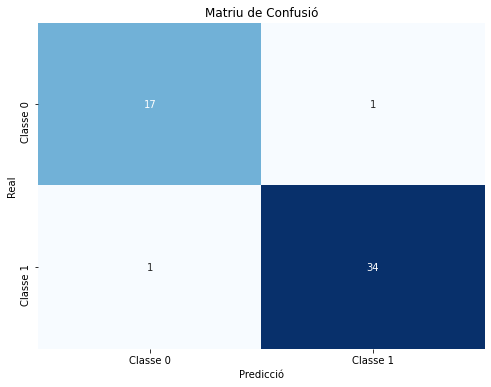

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        35

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



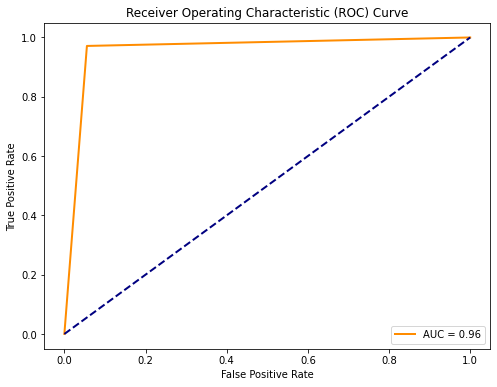

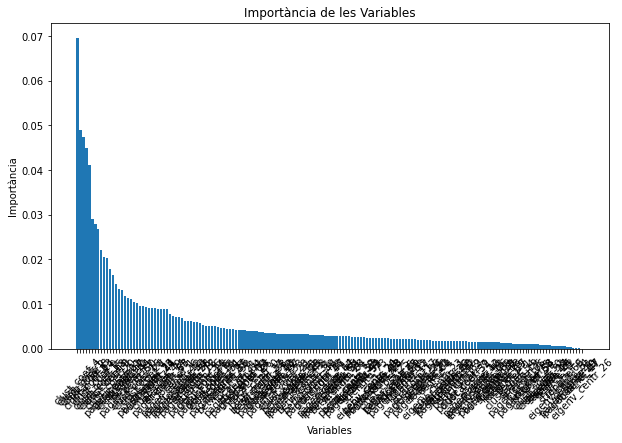

In [86]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# RANDOM FOREST CLASSIFIER
# Creem el model de Random Forest Classifier.
model_RFC = RandomForestClassifier(random_state=42)

# Entrenem el model utilitzant dades d'entrenament.
model_RFC.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_RFC.predict(X_test)

# Evaluem el model RFC.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model RFC.
importancia = model_RFC.feature_importances_

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Support Vector Machine (SVM)**

Training set - Features: (212, 170), Labels: (212,)
Testing set - Features: (53, 170) Labels: (53,)


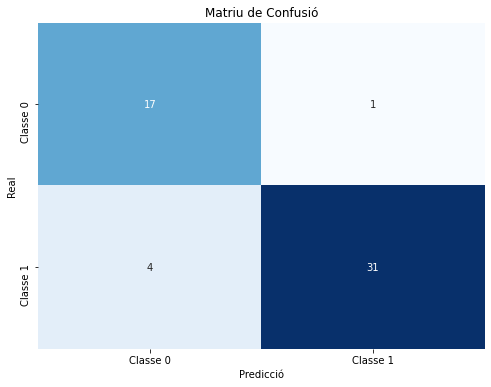

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.97      0.89      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.92      0.90        53
weighted avg       0.91      0.91      0.91        53



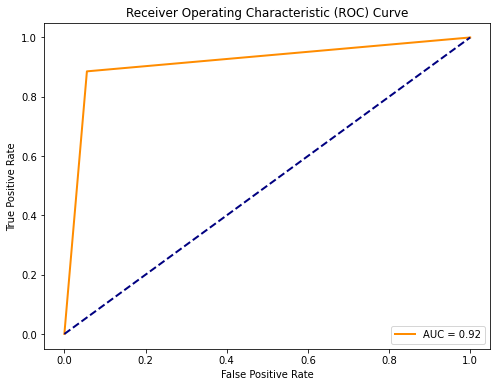

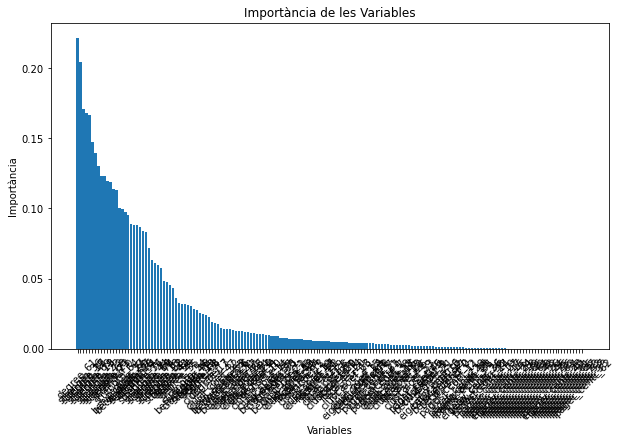

In [87]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# Suppot Vector Machine (SVM).
# Creem el model de Suppor vector Machine.
model_SVM = SVC(kernel='linear')

# Entrenem el model utilitzant dades d'entrenament.
model_SVM.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_SVM.predict(X_test)

# Evaluem el model.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_SVM.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: KNN** 

Training set - Features: (212, 170), Labels: (212,)
Testing set - Features: (53, 170) Labels: (53,)


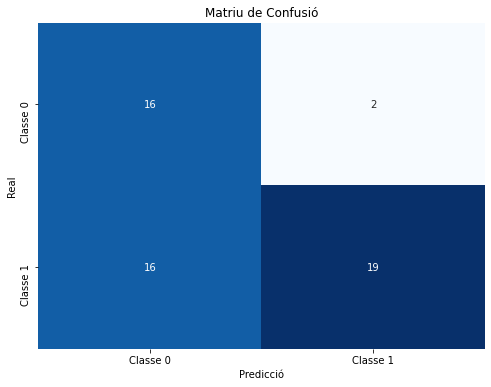

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.89      0.64        18
           1       0.90      0.54      0.68        35

    accuracy                           0.66        53
   macro avg       0.70      0.72      0.66        53
weighted avg       0.77      0.66      0.67        53



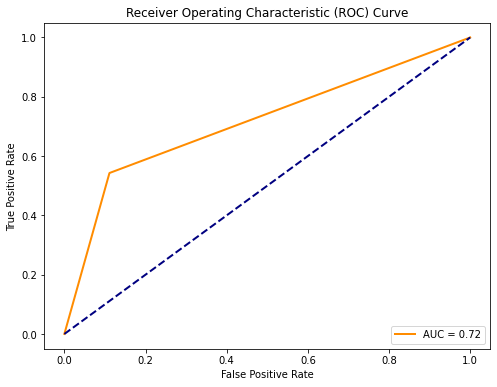

In [88]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

print(f"Training set - Features: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing set - Features: {X_test.shape} Labels: {y_test.shape}")

# KNN
# Se crea el modelo KNN.
model_KNN = KNeighborsClassifier(n_neighbors=2)

# Entrenem el model utilitzant dades d'entrenament.
model_KNN.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_KNN.predict(X_test)

# Evaluem el model KNN.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* **Local: Logistic regression**

/home/guillem/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


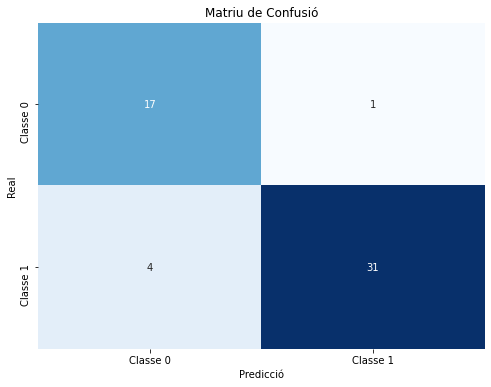

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.97      0.89      0.93        35

    accuracy                           0.91        53
   macro avg       0.89      0.92      0.90        53
weighted avg       0.91      0.91      0.91        53



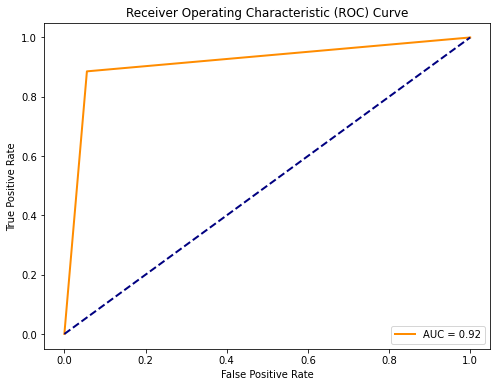

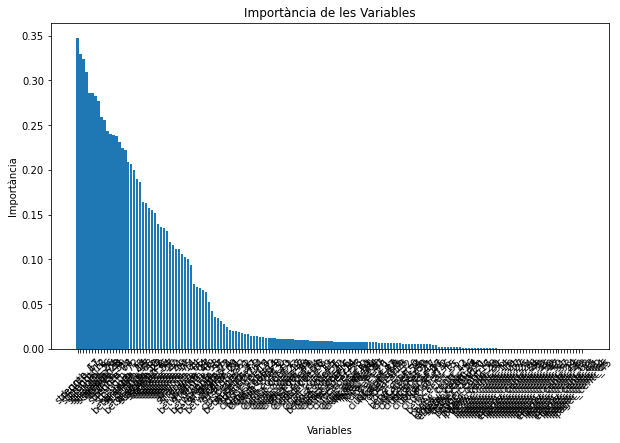

In [89]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Logistic Regression
# Se crea el modelo Logistic Regression.
model_LR = LogisticRegression()

# Entrenem el model utilitzant dades d'entrenament.
model_LR.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_LR.predict(X_test)

# Evaluem el model Logistic Regression.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Obtenim la importancia de cada variable obtinguda pel model.
importancia = np.abs(model_LR.coef_[0])

# Ordenem les importàncies i les variables corresponents.
indexes = np.argsort(importancia)[::-1]
feature_names = [list_significative_metrics_local[i] for i in range(X_selected_cols.shape[1])]

# Plot de la importància de cada variable.
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected_cols.shape[1]), importancia[indexes], align='center')
plt.xticks(range(X_selected_cols.shape[1]), [feature_names[i] for i in indexes], rotation=45)
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.title('Importància de les Variables')
plt.show()


* **Local: Gaussian Naive Bayes (GNB)**

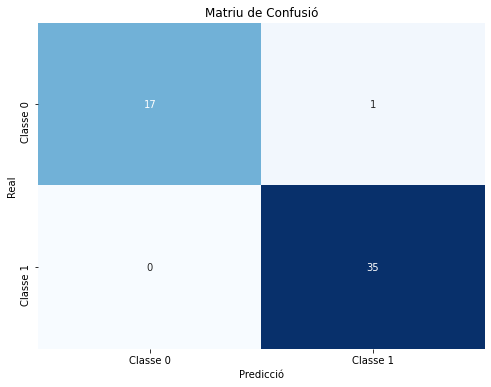

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.97      1.00      0.99        35

    accuracy                           0.98        53
   macro avg       0.99      0.97      0.98        53
weighted avg       0.98      0.98      0.98        53



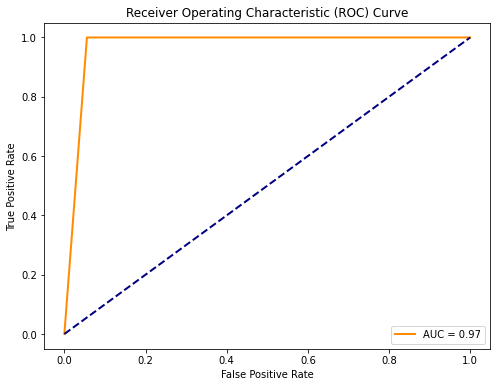

In [90]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Seleccionem les variables significatives.
X_selected_cols = df_local[list_significative_metrics_local]

y = df['controls_ms']

# Dividim les dades en Train i test.
X_train, X_test, y_train, y_test = train_test_split(X_selected_cols, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
# Se crea el modelo Gaussian Naive Bayes.
model_GNB = GaussianNB()

# Entrenem el model utilitzant dades d'entrenament.
model_GNB.fit(X_train, y_train)

# Duem a terme una predicció amb les dades de Test.
y_pred = model_GNB.predict(X_test)

# Evaluem el model Gaussian Naive Bayes.
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Matriu de Confusió.
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriu de confusió.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicció')
plt.ylabel('Real')
plt.title('Matriu de Confusió')
plt.show()

# Show results.
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)

# Calculem la curva ROC.
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot de la curva ROC.
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Clinical and demographic characteristics of the subjects included in the study.

In [55]:
# Construct Table 1 (Clinic and demographic characteristics of the subjects).

demographic_features_variables = ['sex', 'age']
demographic_features_variables_dict = dict()

for var in demographic_features_variables:
    dades_HV = df_HV[var]
    dades_MS = df_MS[var]

    normalitat_HV = check_normality(dades_HV, 0.05)
    normalitat_MS = check_normality(dades_MS, 0.05)
    
    if normalitat_HV and normalitat_MS:
        _, pvalue_t = ttest_ind(dades_HV, dades_MS)
        #print("pvalue_t:", pvalue_t)
        demographic_features_variables_dict[var] = pvalue_t
    
    # Prova mostres independents.
    else:
        _, pvalue_u = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
        #print("pvalue_u:", pvalue_u)
        demographic_features_variables_dict[var] = pvalue_u
        

In [56]:
# RRMS: 0, SPMS: 1, PPMS (2)
RRMS = df_MS[df_MS['mstype'] == 0].count()['mstype']
SPMS = df_MS[df_MS['mstype'] == 1].count()['mstype']
PPMS = df_MS[df_MS['mstype'] == 2].count()['mstype']

perc_RRMS = RRMS/len(list(df_MS['mstype']))
perc_SPMS = SPMS/len(list(df_MS['mstype']))
perc_PPMS = PPMS/len(list(df_MS['mstype']))


In [57]:
# Obtenim la mitjana de volum de tots els nodes Controls.
# Llegir excel.
volum_df_HV = pd.read_excel('VOLUM_NODES_CONTROLS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_HV = volum_df_HV.mean()
avg_volum_HV = column_avg_HV.mean()
std_volum_HV = column_avg_HV.std()


# Obtenim la mitjana de volum de tots els nodes MS.
# Llegir excel.
volum_df_MS = pd.read_excel('VOLUM_NODES_PATIENTS.xls')

# Calculem la mitjana de tots els nodes.
column_avg_MS = volum_df_MS.mean()
avg_volum_MS = column_avg_MS.mean()
std_volum_MS = column_avg_MS.std()

# Comprovem la normalitat i calculem el pvalue.
dades_HV = column_avg_HV
dades_MS = column_avg_MS

normalitat_HV = check_normality(dades_HV, 0.05)
normalitat_MS = check_normality(dades_MS, 0.05)

if normalitat_HV and normalitat_MS:
    _, pvalue_volum = ttest_ind(dades_HV, dades_MS)
    print("pvalue_t:", pvalue_volum)

# Prova mostres independents.
else:
    _, pvalue_volum = mannwhitneyu(dades_HV, dades_MS, alternative='two-sided')
    print("pvalue_u:", pvalue_volum)
    

pvalue_u: 0.4622499461255427


In [58]:
print("          'MS patients'     'HV volunteers'    'Pvalue'\n")
print(f"Female (N, %): {(df_MS['sex'] == 0).sum()} ({(df_MS['sex'] == 0).sum()/len(list(df_MS['sex']))}), {(df_HV['sex'] == 0).sum()} ({(df_HV['sex'] == 0).sum()/len(list(df_HV['sex']))}) pvalue: {demographic_features_variables_dict['sex']}")
print(f"Age (years): {np.mean(df_MS['age'])} ({np.std(df_MS['age'])}), {np.mean(df_HV['age'])} ({np.std(df_HV['age'])}), pvalue: {demographic_features_variables_dict['age']}\n")
print("Type of MS:")
print(f"RRMS: {RRMS} ({perc_RRMS})  na  na")
print(f"SPMS: {SPMS} ({perc_SPMS})  na  na")
print(f"PPMS: {PPMS} ({perc_PPMS})  na  na\n")
print(f"Avg Node volum: {avg_volum_MS}, {avg_volum_HV}, p_value: {pvalue_volum}")
print(f"Disease Duration: {np.mean(df_MS['dd'])} ({np.std(df_MS['dd'])}),   na   na  ")
print(f"EDSS Score (gravetat): {np.mean(df_MS['edss'])} ({np.std(df_MS['edss'])}),   na   na  ")
print(f"zSDMT: {np.mean(df_MS['sdmtz'])} ({np.std(df_MS['sdmtz'])}),   na   na  ")
print(f"zPASAT: {np.mean(df_MS['zpasat'])} ({np.std(df_MS['zpasat'])}),   na   na  ")
print(f"zAttention: {np.mean(df_MS['zattention'])} ({np.std(df_MS['zattention'])}),   na   na  ")


          'MS patients'     'HV volunteers'    'Pvalue'

Female (N, %): 104 (0.7074829931972789), 99 (0.8389830508474576) pvalue: 0.01216832937605819
Age (years): 47.33013605442177 (10.110612797350703), 36.61790630466201 (3.6448028929959047), pvalue: 8.388594573473506e-24

Type of MS:
RRMS: 125 (0.8503401360544217)  na  na
SPMS: 16 (0.10884353741496598)  na  na
PPMS: 6 (0.04081632653061224)  na  na

Avg Node volum: 8635.448684210527, 9328.701754385966, p_value: 0.4622499461255427
Disease Duration: 15.961088435374148 (9.01906326713972),   na   na  
EDSS Score (gravetat): 2.6598639455782314 (1.6892883766794917),   na   na  
zSDMT: 0.07902865573770491 (1.0603561342433823),   na   na  
zPASAT: -0.2892552 (1.3281360383373986),   na   na  
zAttention: -0.2857193548387097 (1.0301272962112904),   na   na  


### Visualització en 3D cerebral amb representació dels nodes

In [59]:
# Llegim el fitxer.
df_nodes_coordinates = pd.read_table('Node_mindboggle_default.node', header = None)
df_nodes_coordinates.rename(columns={0: "x", 1: "y", 2: "z", 5: "node_name"}, inplace = True)
df_nodes_coordinates.head()

,x,y,z,3,4,node_name
0,-4.28,16.90,28.3,2,1,ctx-lh-caudalanteriorcingulate
1,-35.20,12.00,46.5,3,1,ctx-lh-caudalmiddlefrontal
2,-6.44,-87.50,25.5,4,1,ctx-lh-cuneus
3,-22.20,-4.61,-35.8,5,1,ctx-lh-entorhinal
4,-33.30,-41.70,-21.6,6,1,ctx-lh-fusiform


In [60]:
# Create an example adjacency matrix (replace this with your own matrix)
matrix = pd.read_csv(
    os.path.join(
        os.getcwd(), 'subject_networks_rfMRI_v1', '002MSVIS_r_matrix.csv'
    ), header=None
)
adjacency_matrix = np.array(matrix)


In [61]:
# Construim el llistat de coordenades de cada node.
node_coordinates = list()

for i in range(0, 76):
    node_name = dict_data[str(i)]
    filtered_df = df_nodes_coordinates[df_nodes_coordinates['node_name'] == node_name]
    node_coordinates.append([float(filtered_df['x']), float(filtered_df['y']), float(filtered_df['z'])])
    

/home/guillem/.local/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


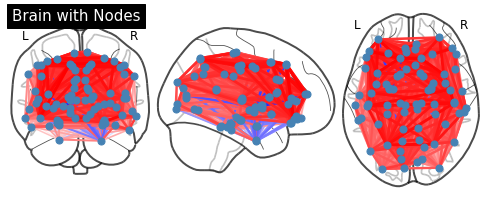

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Visualització en 3D cerebral amb representació dels nodes.
plotting.plot_connectome(
    adjacency_matrix=adjacency_matrix,
    node_coords=node_coordinates,
    node_color='steelblue',
    title='Brain with Nodes',
    display_mode='ortho',
    annotate=True,
)
plt.show()